In [8]:
!ls *.xvg

potential.xvg  pressure.xvg  rmsd.xvg  temperature.xvg


In [1]:
import numpy as np
import matplotlib.pyplot as plt

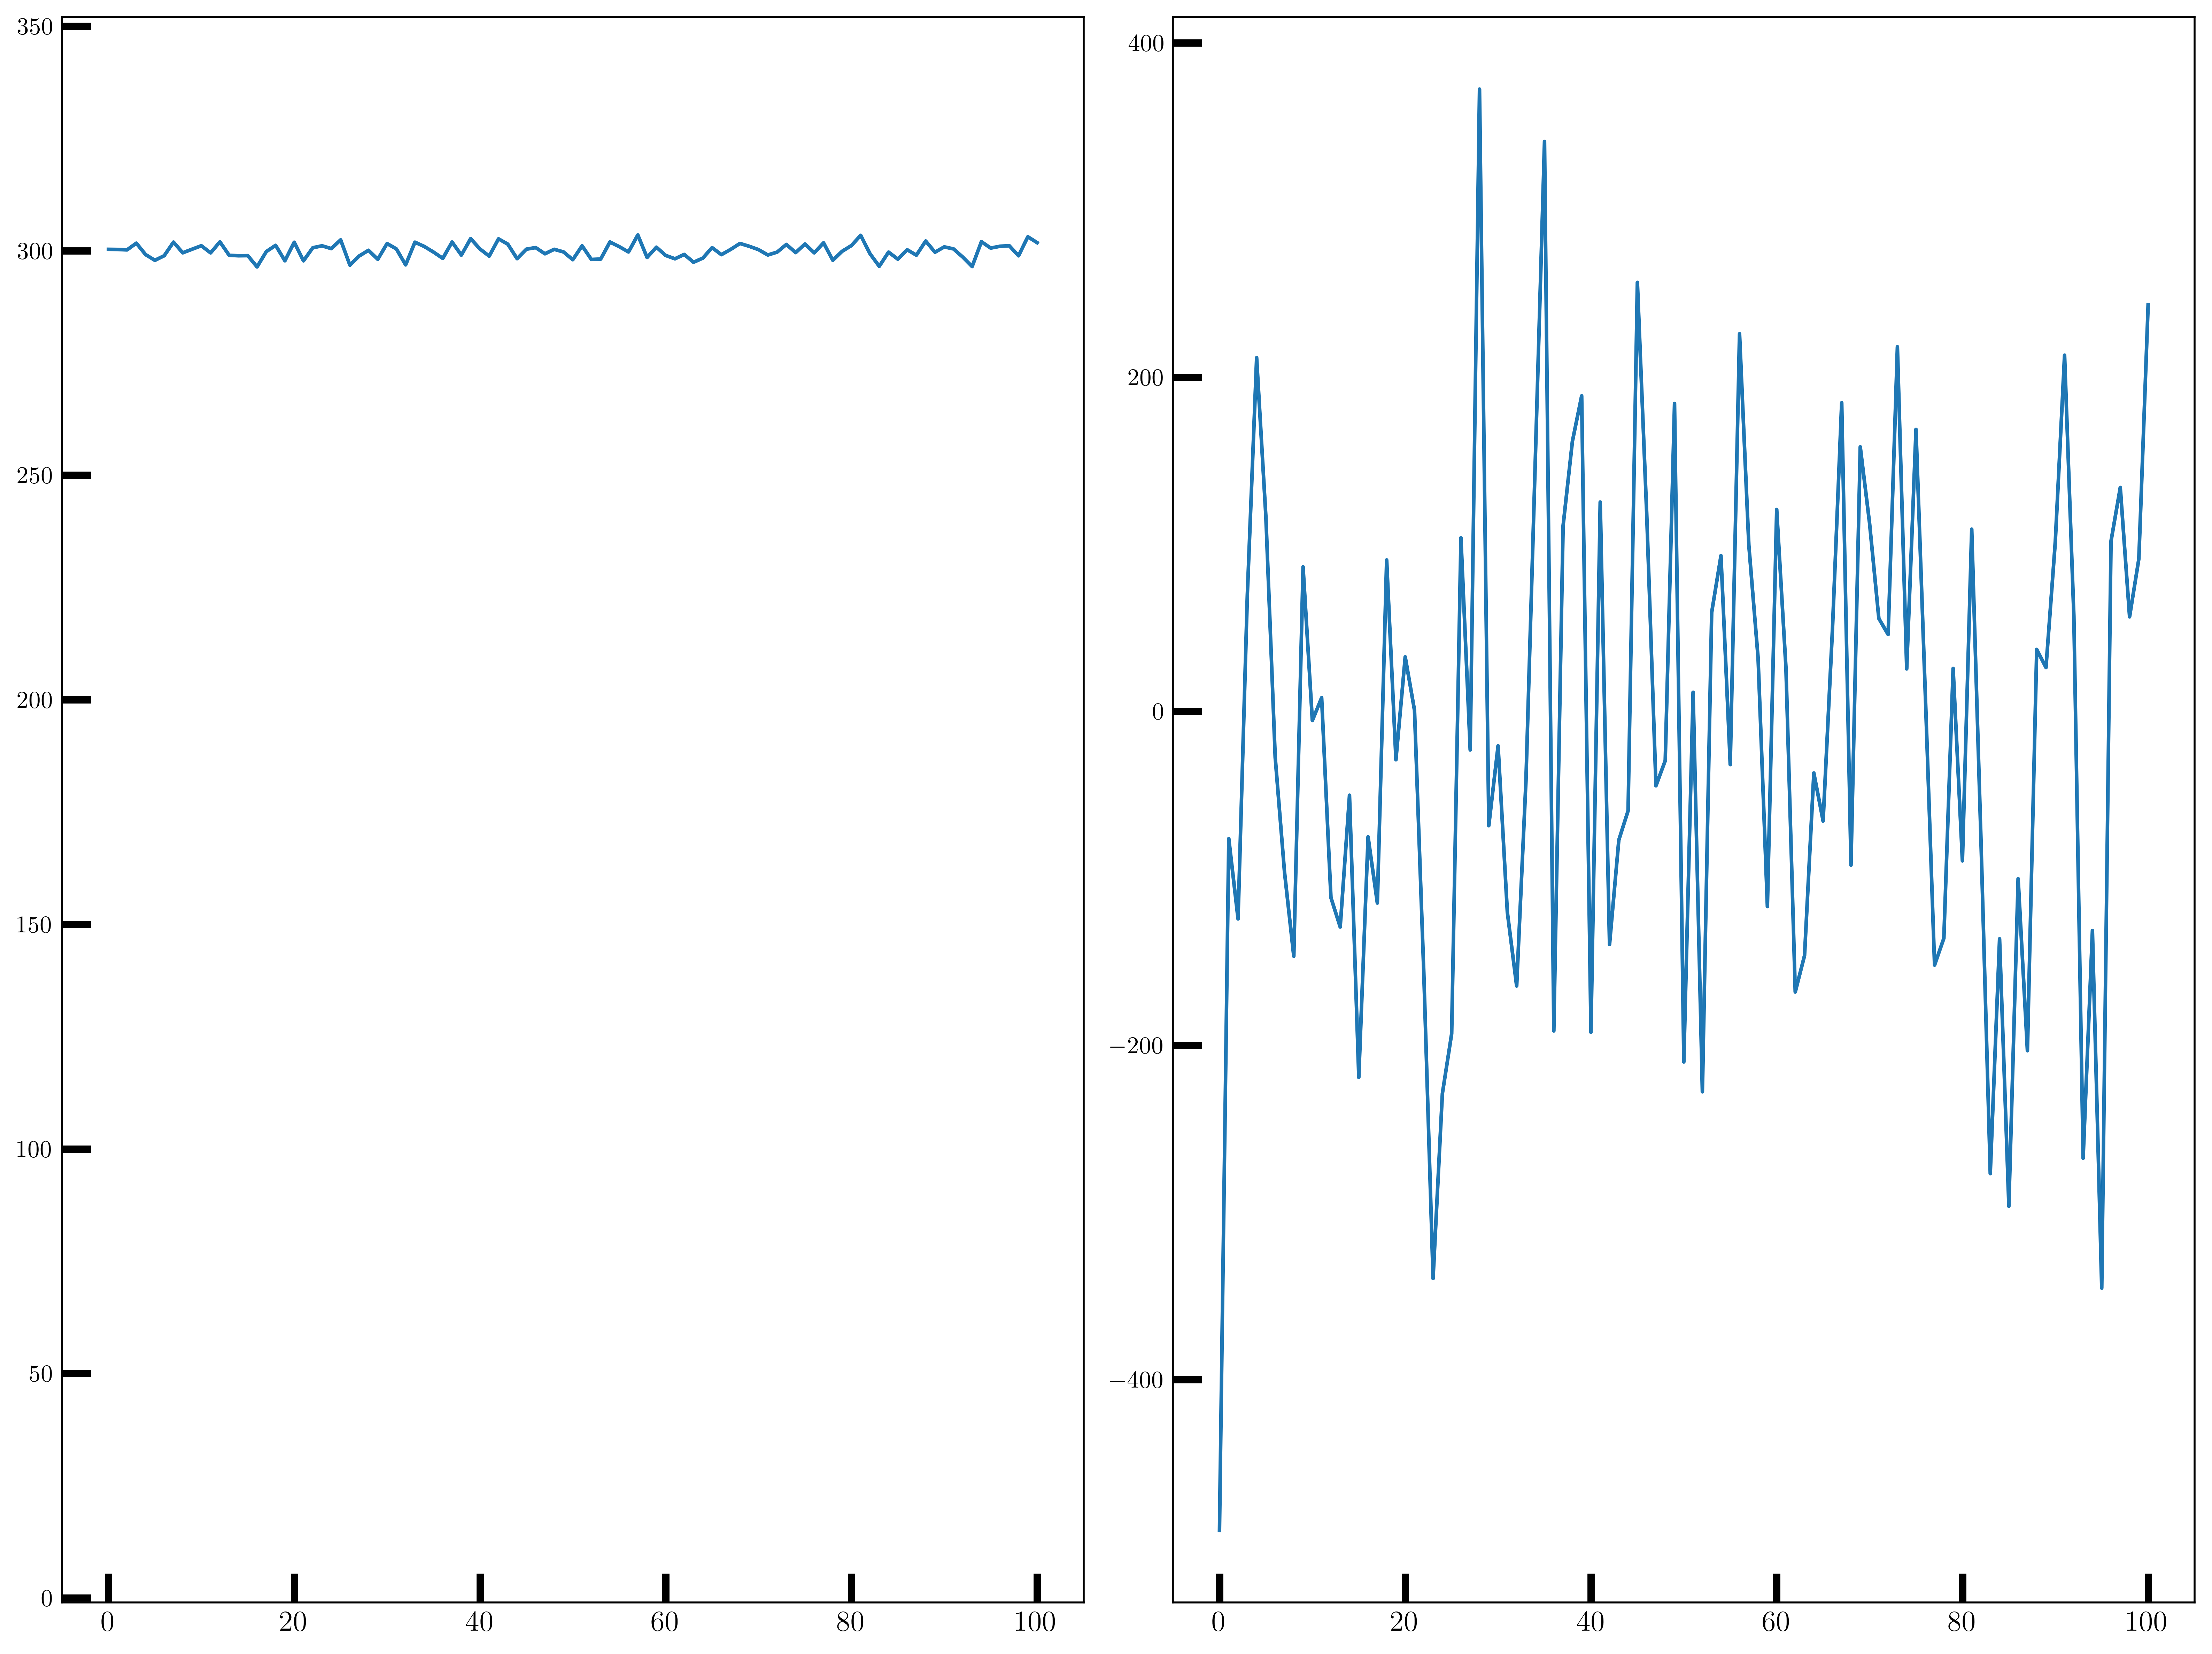

In [7]:
xvg_t = "temperature.xvg"
xvg_p = "pressure.xvg"

fig, (ax1, ax2) = plt.subplots(1,2, tight_layout=True)
t, temp = np.loadtxt(xvg_t, comments=['#','@'], unpack=True)
ax1.set_ylim(-1,352)
ax1.plot(t,temp)
t, p = np.loadtxt(xvg_p, comments=['#','@'], unpack=True)
ax2.plot(t,p)

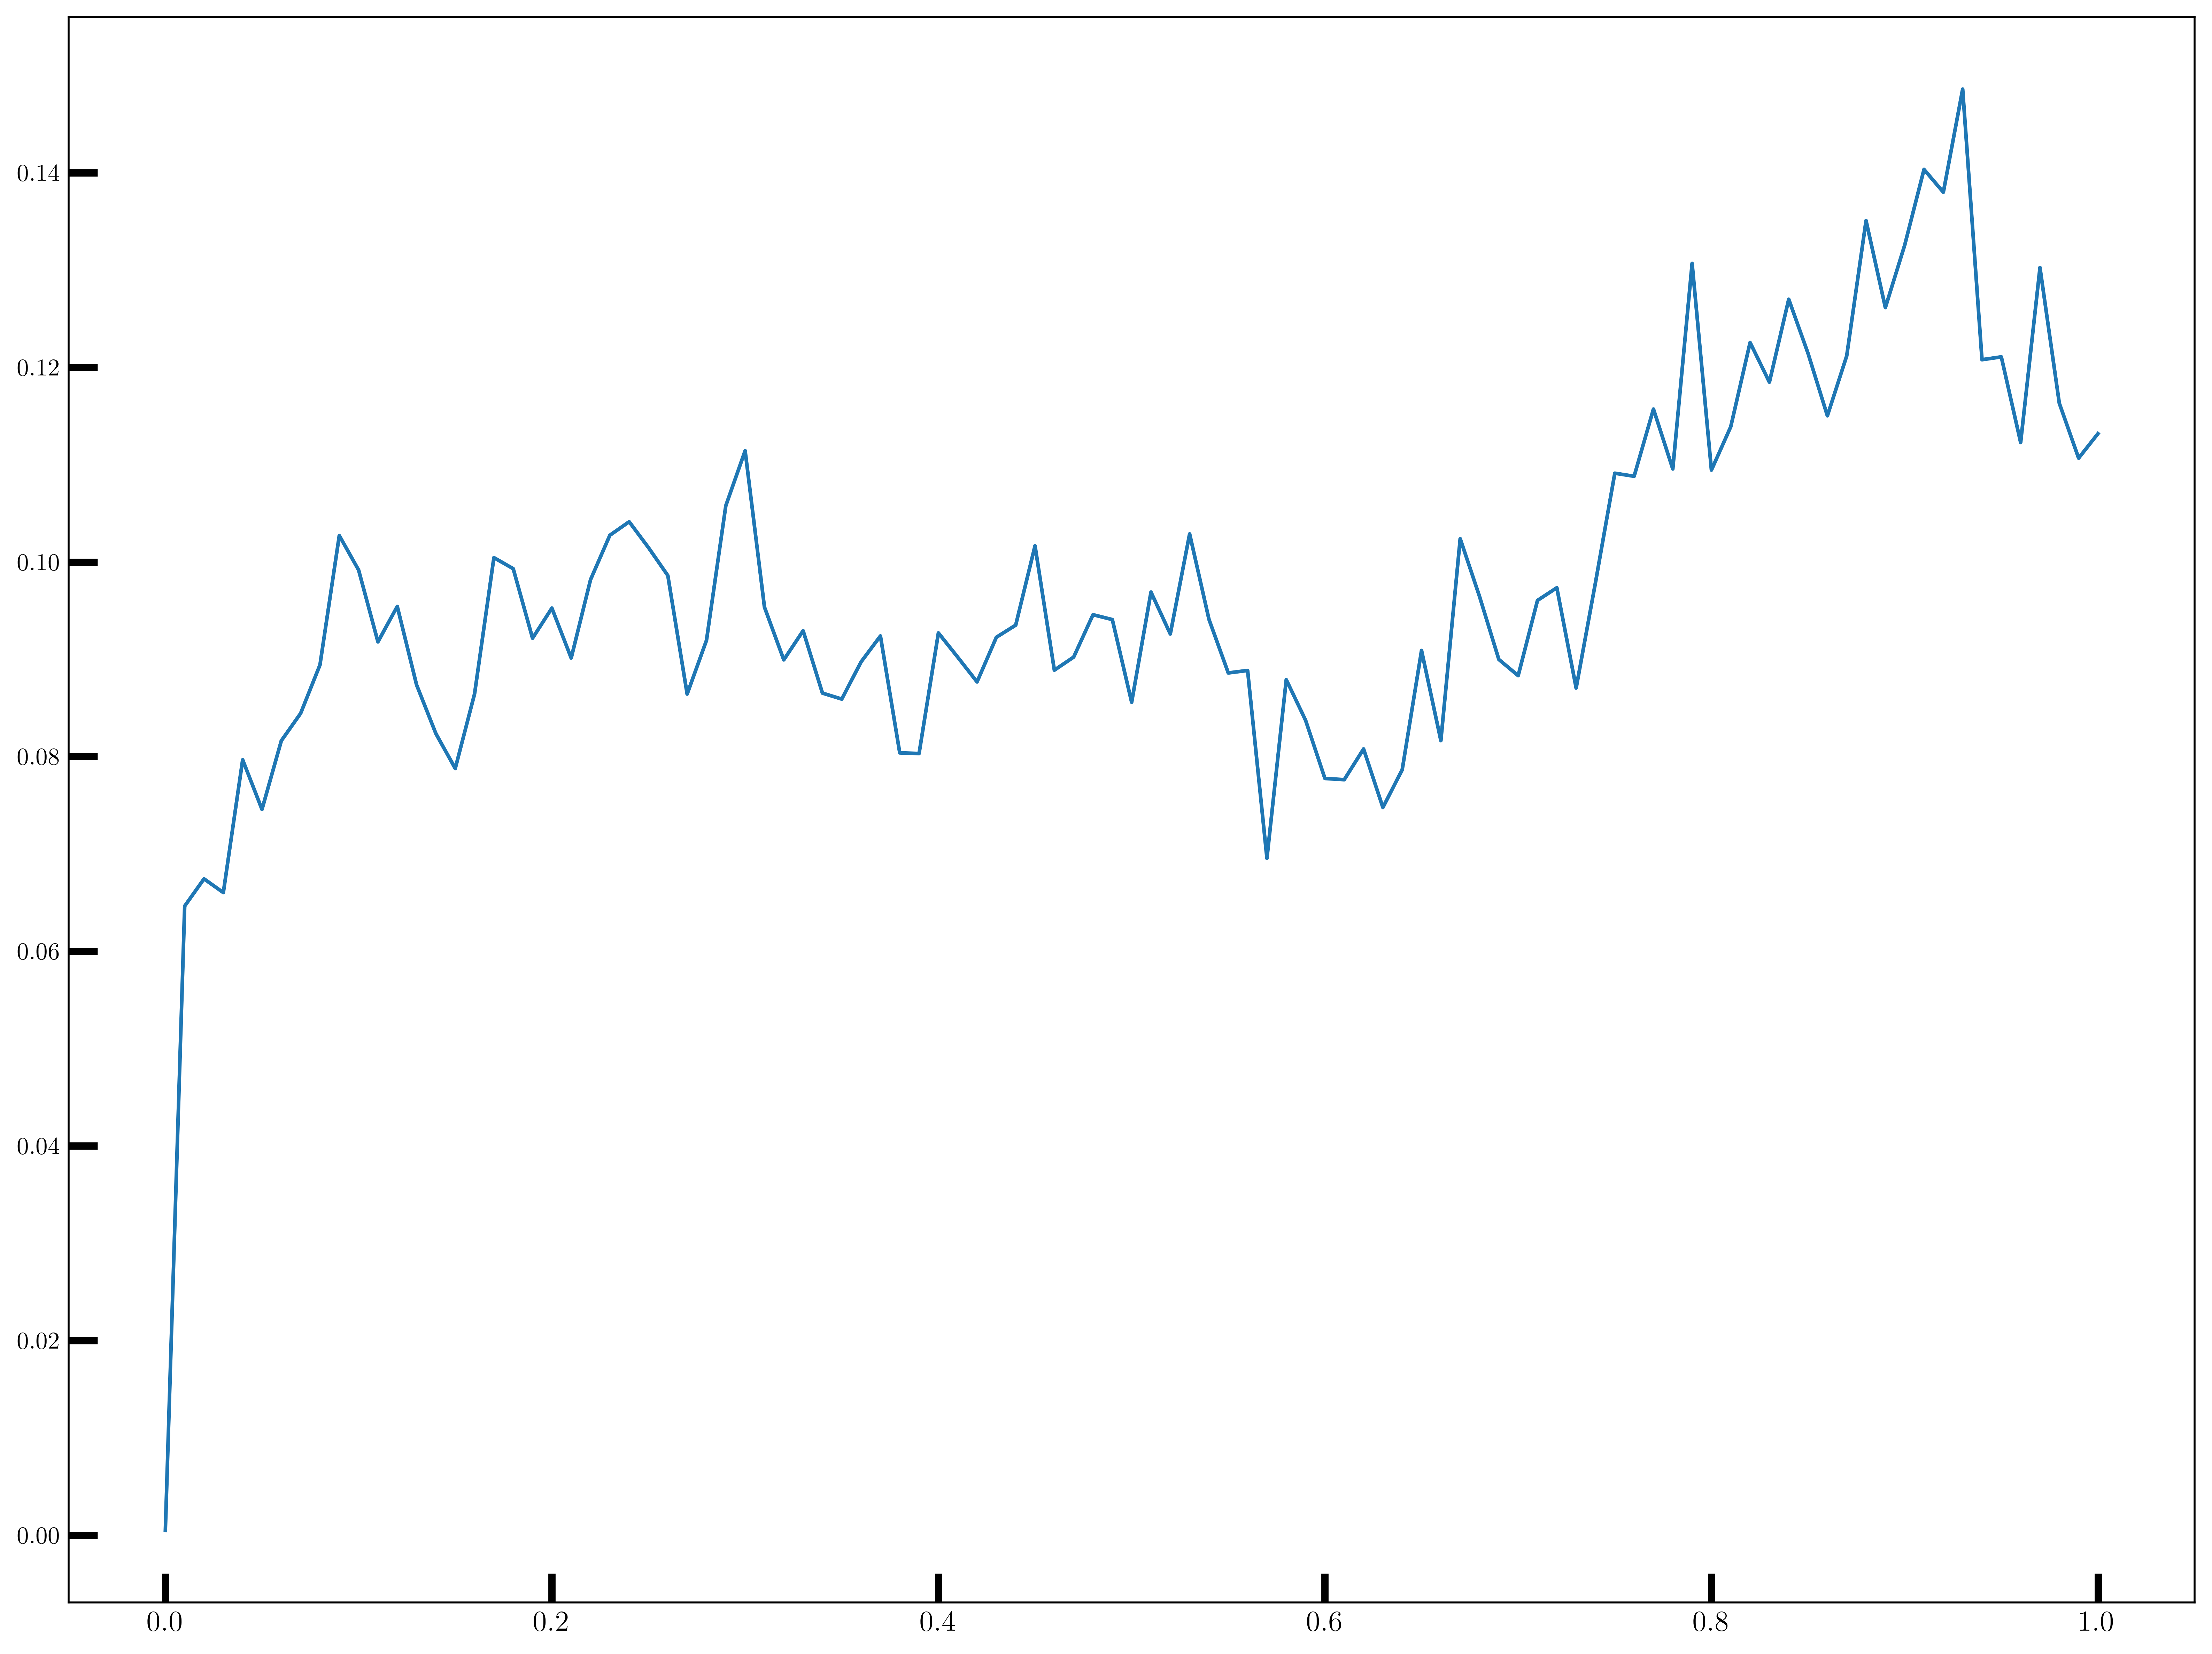

In [9]:
import matplotlib.pyplot as plt
xvg_r = "rmsd.xvg"

t, rms = np.loadtxt(xvg_r, comments=['#','@'], unpack=True)
plt.plot(t,rms)